<center>
  <h1>Lei de Lambert Fuzzy 🧪🤔</h1>
  <h3>Previsão de concentrações via Lei de Lambert-Beer: um problema inverso para quadrados mínimos fuzzy.</h3>
  <b>Yasmin B. Shimizu, Glauber N. de Oliveira, Valéria S. Marangoni, Vinícius F. Wasques</b>
</center>

<p style="text-align: center;">
  Quadrados mínimos fuzzy · Interatividade Fuzzy · Lei de Lambert-Beer · Problemas inversos
</p>


<p style="text-align: center;">
  Projeto desenvolvido a partir de 
  <a href="https://github.com/LuzMendes/Metodos-de-Quadrados-Minimos-Fuzzy">
    Mendes, Nunes, Shimizu & Wasques (2025)</a> [7] para o VII Congresso Brasileiro de Sistemas Fuzzy (CBSF).
</p>

<center>
  <img src="https://github.com/user-attachments/assets/ccb6f5f1-0e07-4eb2-aa7c-5f681c57a59c" width="1000" style="margin-bottom: -50px;"/>
  <img src="https://pages.cnpem.br/cbsf/wp-content/uploads/sites/187/2025/02/site.png" width="350"/>
</center>



## 📝Resumo

Uma prática comum quando tratamos de projetos experimentais é a análise da concentração das amostras estudadas, realizando medições em triplicatas para minimizar incertezas intrínsecas às medidas e construindo intervalos de confiança para melhor estimar os resultados obtidos. No presente trabalho, visou-se utilizar o método de quadrados mínimos fuzzy para explorar a Lei de Lambert-Beer, considerando valores reais de concentração de amostras em $x$ e suas absorbâncias fuzzy em $Y$ , e adotando o desvio padrão das triplicatas como incerteza controlada. A partir disso, tal questão pode ser vista e tratada como um problema inverso, em que busca-se prever valores de concentração desconhecidos com absorbância conhecida. Para isso, produzimos e caracterizamos soluções de cloreto de cobalto com diferentes concentrações, construindo curvas de calibração contidos nos conjuntos reais e fuzzy, comparando os ajustes realizados em cada caso e os valores de concentração medidos. Desse modo, analisamos duas possíveis soluções fuzzy obtidas, avaliando qual das duas é mais adequada para o problema considerado.

## 🎲 Metodologia

Primeiramente, é feito a importação de bibliotecas que serão utilizadas ao longo do projeto. `pandas` é utilizada para tratamento de dados, `numpy` é utilizado para manipulação algébrica e `matplotlib` para a visualização de gráficos.

In [1]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CPU times: total: 406 ms
Wall time: 4.27 s


#### Tratamento de dados

Para este trabalho, foram produzidos dados experimentais. As amostras foram preparadas a partir de diluições seriadas de uma solução de CoCl$_2$ a 2M, totalizando 20 concentrações diferentes. Cada concentração foi alocada em triplicatas na placa ELISA de 96 poços, contendo 200 $\mu$L de solução em cada poço. As medidas de absorção foram obtidas no equipamento de Leitoras de Placa ELISA, no comprimento de onda 492 nm, no Lab. Rosalind Franklin da Ilum Escola de Ciência. Os dados de absorbância foram disponibilizados em formato .txt no <a href="https://github.com/yasminbshimizu/Lei_de_Lambert_Fuzzy"> repositório Github </a> e foram importados neste notebook através da célula abaixo.

 <div class="alert alert-warning">
  <div style="text-align: center; font-size: 14px"> ⚠️ Para o funcionamento desta célula, é necessário que o arquivo <code>data_CoCl2.txt</code> esteja baixado no mesmo diretório em que o notebook está sendo executado!! </div>
</div>   

In [2]:
%%time

df = pd.read_csv("data_CoCl2.txt", sep = ";", skiprows = 20)

df = df[:63]
concentracao_CoCl2 = [0, 2, 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
concentracao_final = concentracao_CoCl2[1:]

concentracao = []
for x in concentracao_CoCl2:
        concentracao.append(x)
        concentracao.append(x)
        concentracao.append(x)

df["Concentração"] = concentracao
df = df.rename(columns={'A492': 'Absorbância'})
df

CPU times: total: 0 ns
Wall time: 9.78 ms


,Well,Name,Absorbância,Concentração
0,A1,Sample 1.1,0.029,0.0
1,A2,Sample 1.2,0.031,0.0
2,A3,Sample 1.3,0.028,0.0
3,A4,Sample 1.4,2.866,2.0
4,A5,Sample 1.5,2.850,2.0
...,...,...,...,...
58,E11,Sample 1.59,0.322,0.2
59,E12,Sample 1.60,0.330,0.2
60,F1,Sample 1.61,0.205,0.1
61,F2,Sample 1.62,0.194,0.1


Podemos, então, tratar estes dados de absorbância para aplicá-los ao ajuste de curva tradicional e ajuste de curva fuzzy. Para isso, usaremos as funções `trata_dados` e `trata_dados_fuzzy`, importadas do *script* `lei_de_lambert_fuzzy.py` disponível no <a href="https://github.com/yasminbshimizu/Lei_de_Lambert_Fuzzy"> repositório Github </a>. A primeira calcula média e desvio padrão do conjunto de amostras, e retira o branco com base na primeira absorbância medida, retornando os valores finais de absorbância média e seus respctivos desvios padrão. A segunda faz processo semelhante, mas considera o desvio padrão para formar um número triangular fuzzy, retornando apenas absorbâncias na forma (a,b,c). 

 <div class="alert alert-warning">
  <div style="text-align: center; font-size: 14px"> ⚠️ Para o funcionamento desta célula, é necessário que o arquivo <code>lei_de_lambert_fuzzy.py</code> esteja baixado no mesmo diretório em que o notebook está sendo executado!! O mesmo vale para todas as células que importarem funções deste arquivo daqui em diante. </div>
</div>   

In [3]:
%%time

from lei_de_lambert_fuzzy import trata_dados, trata_dados_fuzzy

absorb = df["Absorbância"]

absorb_final, desv_final = trata_dados(absorb)
absorb_fuzzy = trata_dados_fuzzy(absorb)

CPU times: total: 0 ns
Wall time: 30.5 ms


Feito isso, dividiremos os dados em conjunto de ajuste e de previsão. Aqui, o conjunto de previsão contará com 5 dos 20 dados, sendo os três últimos e dois entre os demais pontos. Estes terão seu valor de concentração oculto para previsão o modelo, a partir da absorbância. Os demais serão utilizados para ajuste das curvas de calibração.

In [4]:
%%time

i_data = set(range(3, 8)) | set(range(9, 14)) | set(range(15, 20))

i_total = set(range(20))

i_prev = i_total - i_data

xr_data = np.array([concentracao_final[i] for i in i_data])
xr_prev = np.array([concentracao_final[i] for i in i_prev])
yr_data = np.array([absorb_final[i] for i in i_data])
yr_err = np.array([desv_final[i] for i in i_data])

yr_prev = np.array([absorb_final[i] for i in i_prev])
yr_err_prev = np.array([desv_final[i] for i in i_prev])

xf_data = np.array([concentracao_final[i] for i in i_data]).reshape(-1, 1)
xf_prev = np.array([concentracao_final[i] for i in i_prev]).reshape(-1, 1)
yf_data = np.array([absorb_fuzzy[i] for i in i_data])
yf_prev = np.array([absorb_fuzzy[i] for i in i_prev])

CPU times: total: 0 ns
Wall time: 0 ns


#### Ajuste e previsão clássicos

Para o ajuste tradicional, utilizaremos a função `lei_lambert`, que realiza o ajuste de curva, calcula as previsões e plota um gráfico da curva de calibração em relação aos dados conhecidos e previstos.

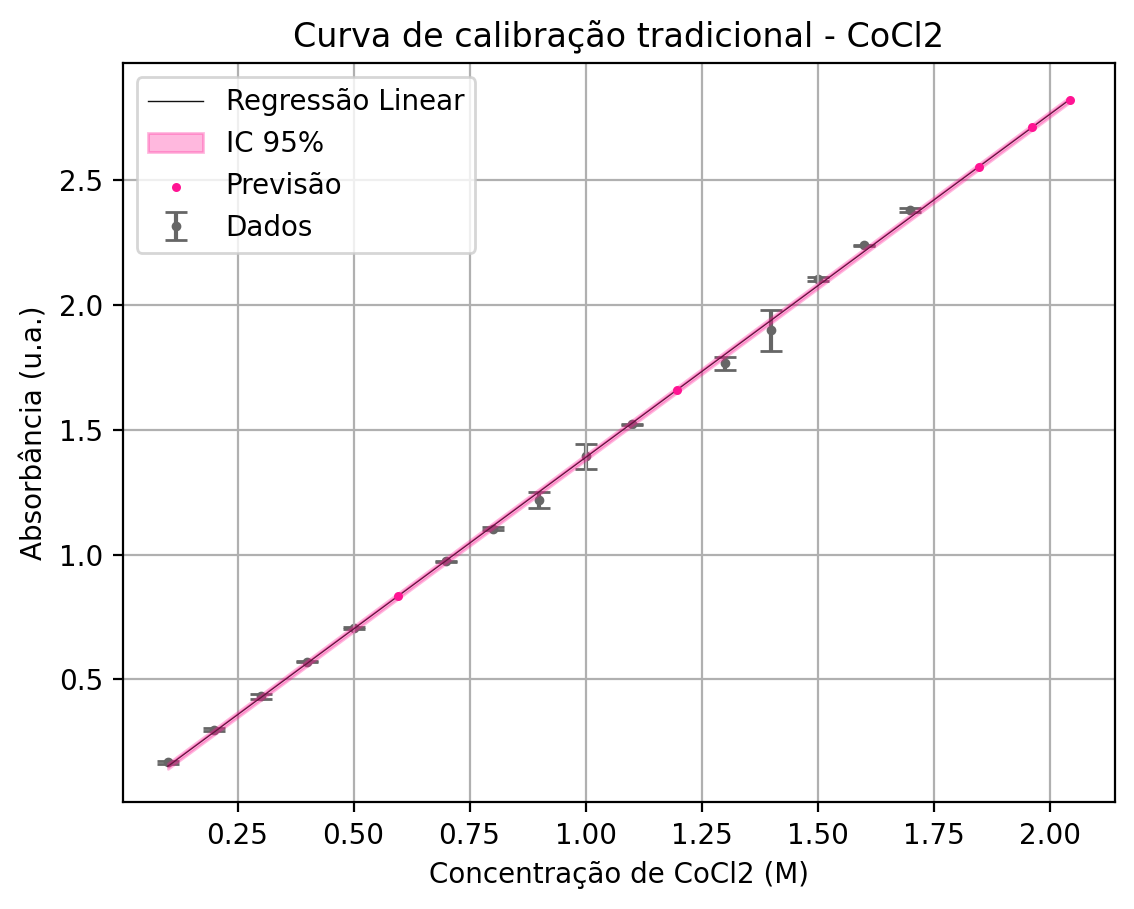

CPU times: total: 31.2 ms
Wall time: 533 ms


In [5]:
%%time

from lei_de_lambert_fuzzy import lei_lambert

title = "Curva de calibração tradicional - CoCl2"

coefs, conc_prev = lei_lambert(xr_data, yr_data, yr_err, abs_prev = yr_prev, titulo = title, xlabel = "Concentração de CoCl2 (M)", ylabel = "Absorbância (u.a.)")

#### Ajuste e previsão Fuzzy

Para o ajuste fuzzy, utilizaremos a função `lei_lambert_fuzzy`, que realiza o ajuste de curva, calcula as previsões e plota três tipos de gráfico: as curvas de calibração com os dados conhecidos, 2D e 3D; as previsões realizadas em meio aos dados conhecidos, 2D e 3D; e gráficos de diâmetro das soluções e das previsões realizadas.

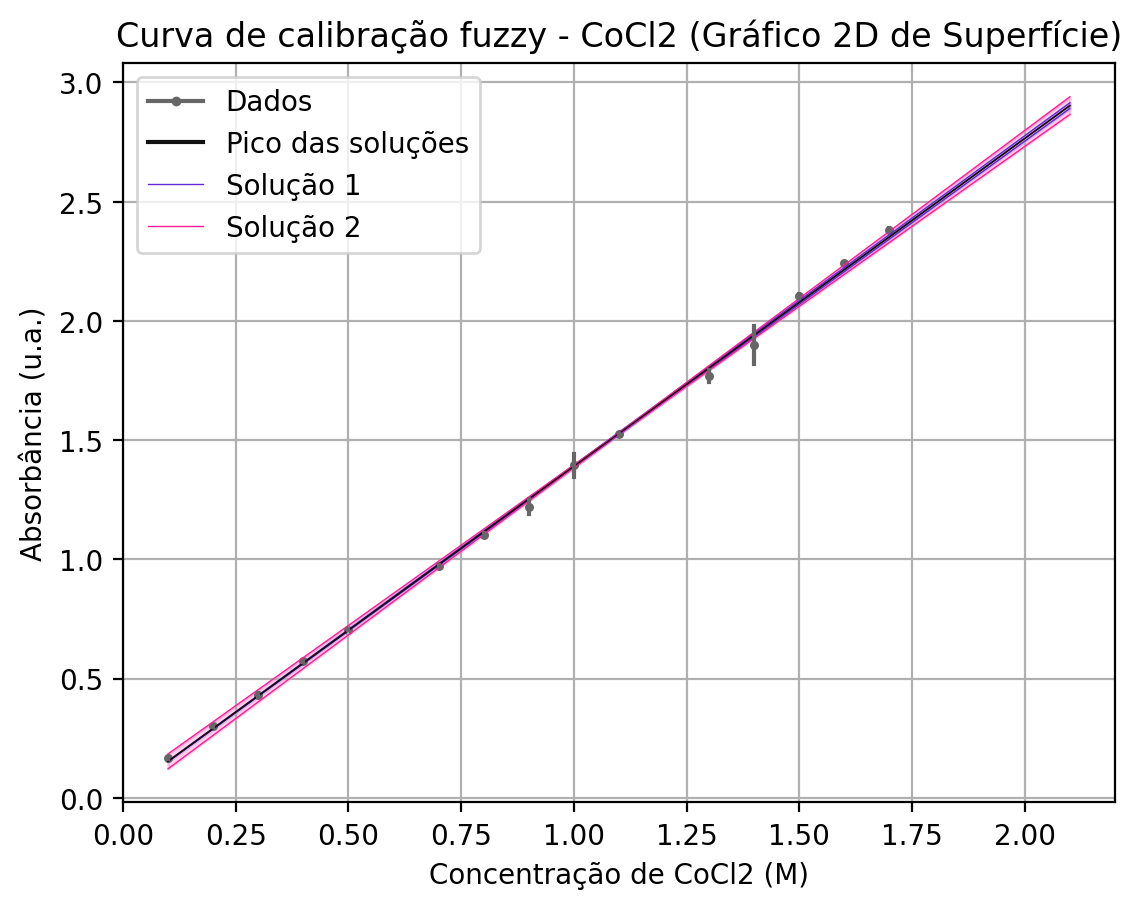

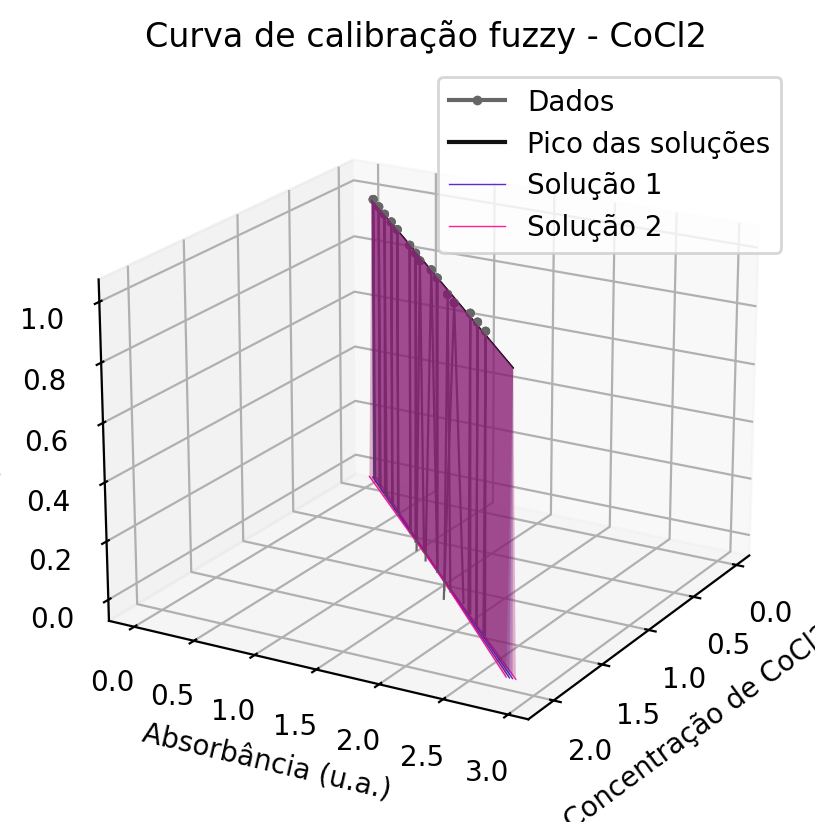

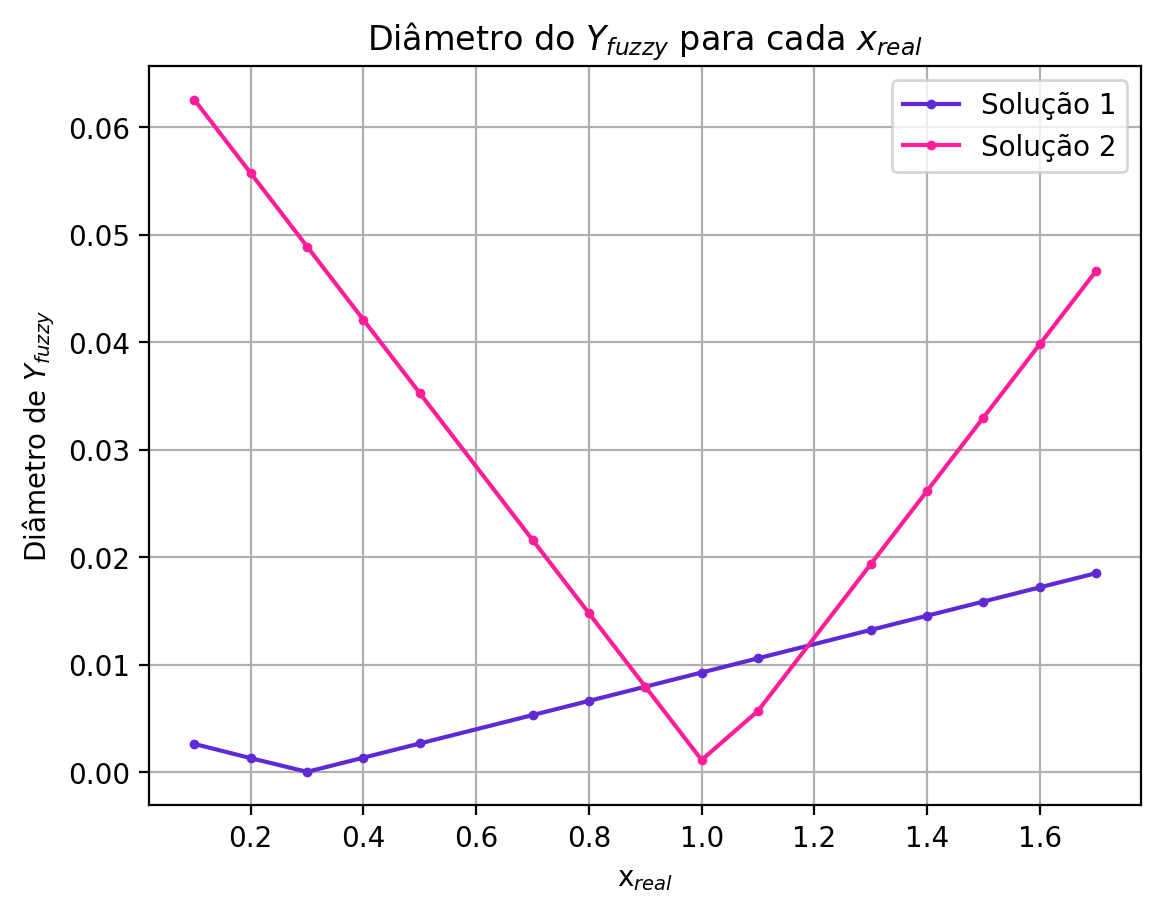

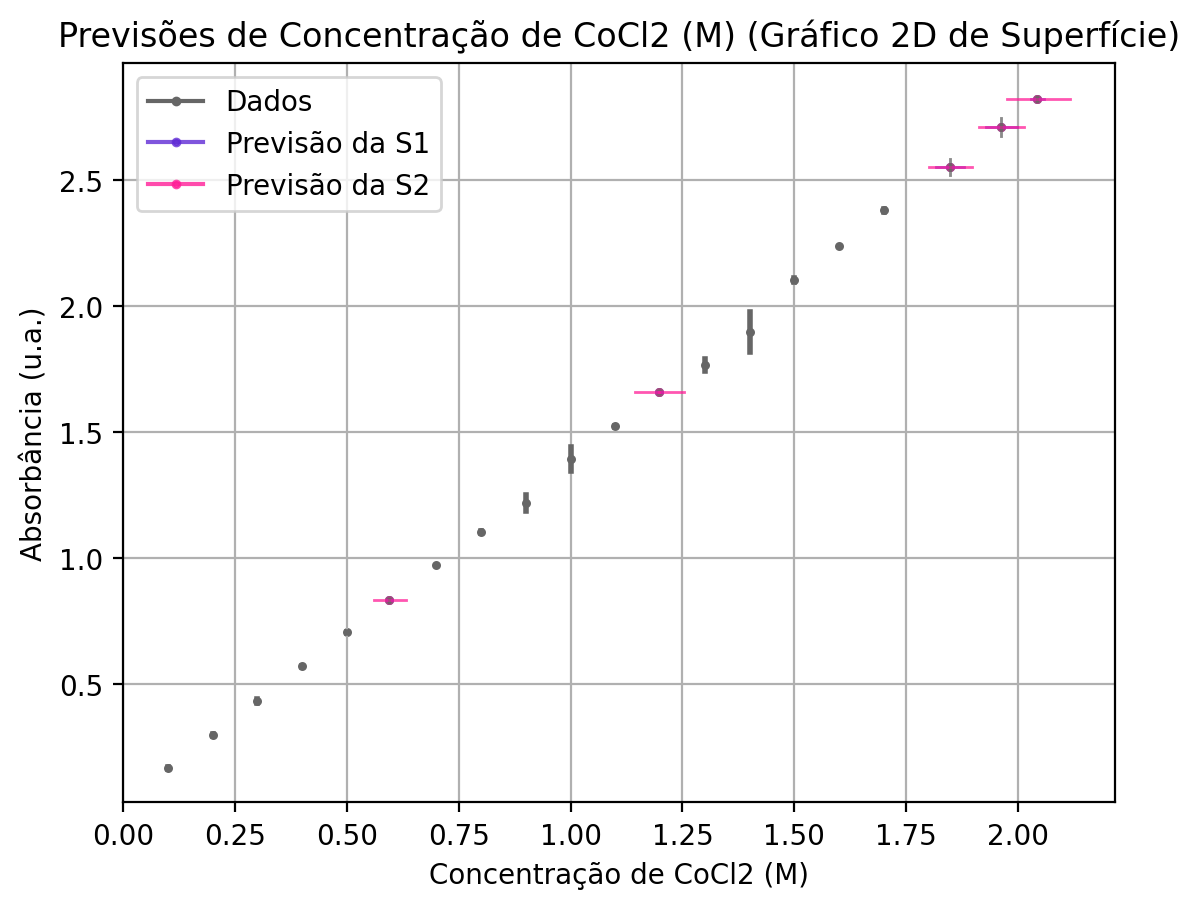

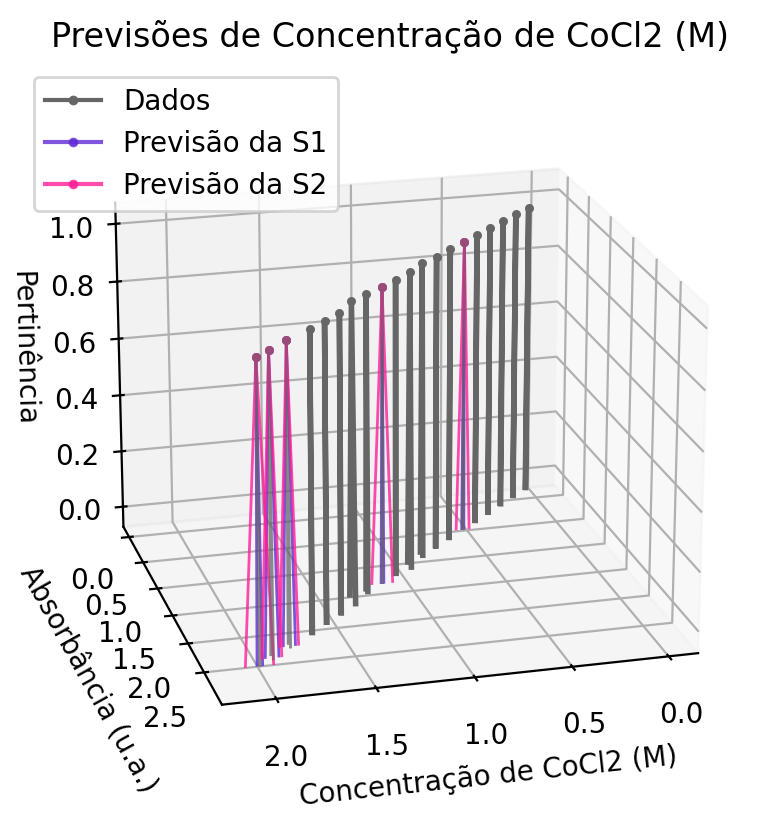

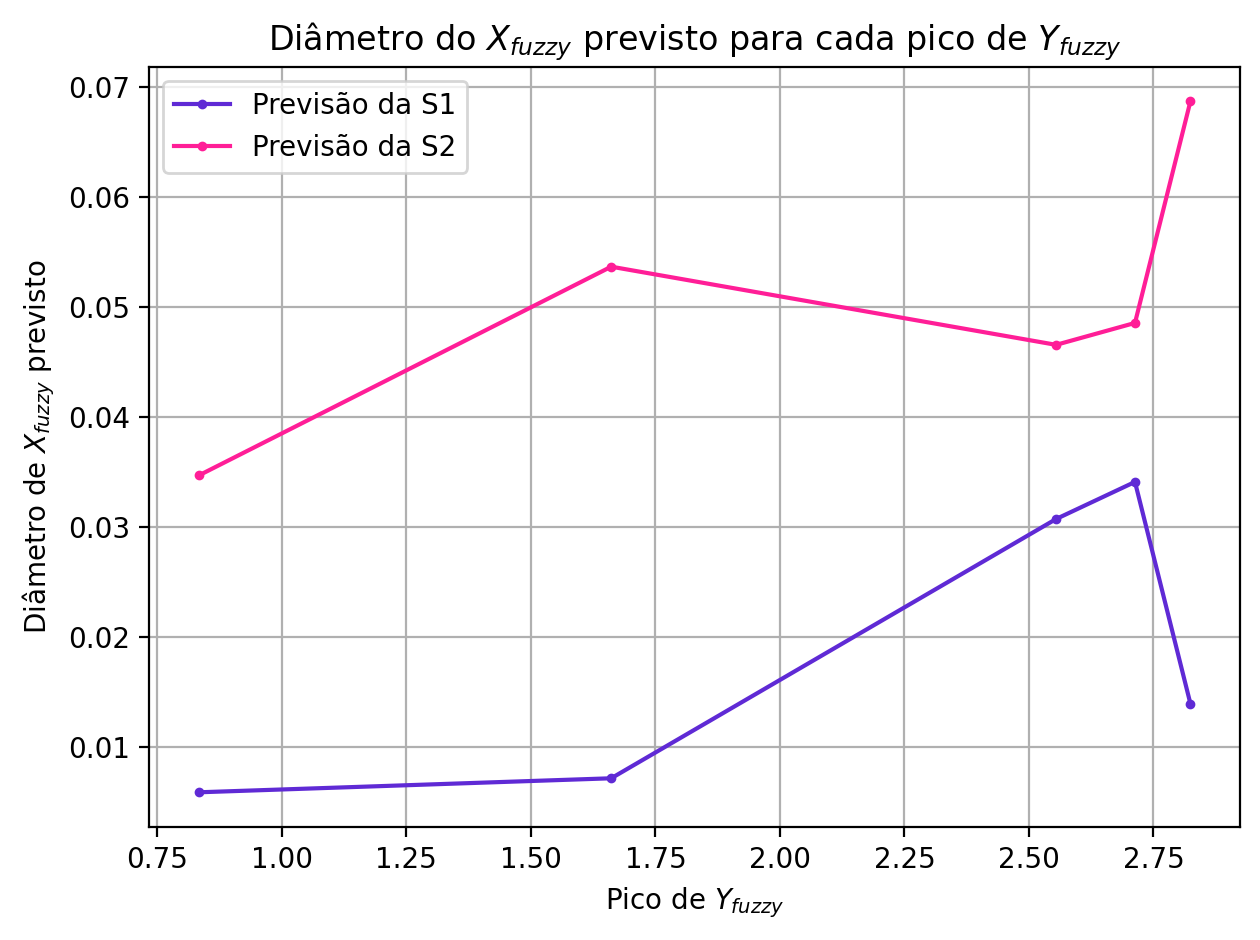

CPU times: total: 656 ms
Wall time: 3.66 s


In [6]:
%%time

from lei_de_lambert_fuzzy import lei_lambert_fuzzy

title = "Curva de calibração fuzzy - CoCl2"

sol, xp = lei_lambert_fuzzy(xf_data, yf_data, y_prev = yf_prev, titulo = title, xlabel = "Concentração de CoCl2 (M)", ylabel = "Absorbância (u.a.)")

## 🗯️ Resultados obtidos

------- REGRESSÃO LINEAR -------
 
Coeficientes do ajuste de curva real:
[0.015200854700854432, 1.3748632478632477]
 
Coeficientes fuzzy da Solução 1 para o ajuste de curva fuzzy:
[[1.36826 1.37486 1.38147]
 [0.01323 0.0152  0.01717]]
 
Coeficientes fuzzy da Solução 2 para o ajuste de curva fuzzy:
[[ 1.34073  1.37486  1.409  ]
 [-0.0195   0.0152   0.0499 ]]
 
 
--- PREVISÃO DE CONCENTRAÇÃO ---
 
Concentrações reais para previsão:
[2.  1.9 1.8 1.2 0.6]
 
Previsão de concentração real:
[2.043208648568001, 1.9622308978670766, 1.8470679290558818, 1.1973063366053505, 0.595064621811649]
 
Previsão de concentração fuzzy pela solução 1:
[(2.029283203086009, 2.0432140969504777, 2.0572645550549153), (1.928153967950594, 1.9622361549539589, 1.9966330506594456), (1.8163603833604713, 1.847072914090647, 1.8780684625234554), (1.1901549315825415, 1.197309786693433, 1.204524968451415), (0.5891853235118826, 0.5950666492103439, 0.6010004076671878)]
 
Previsão de concentração fuzzy pela solução 2:
[(1.9745

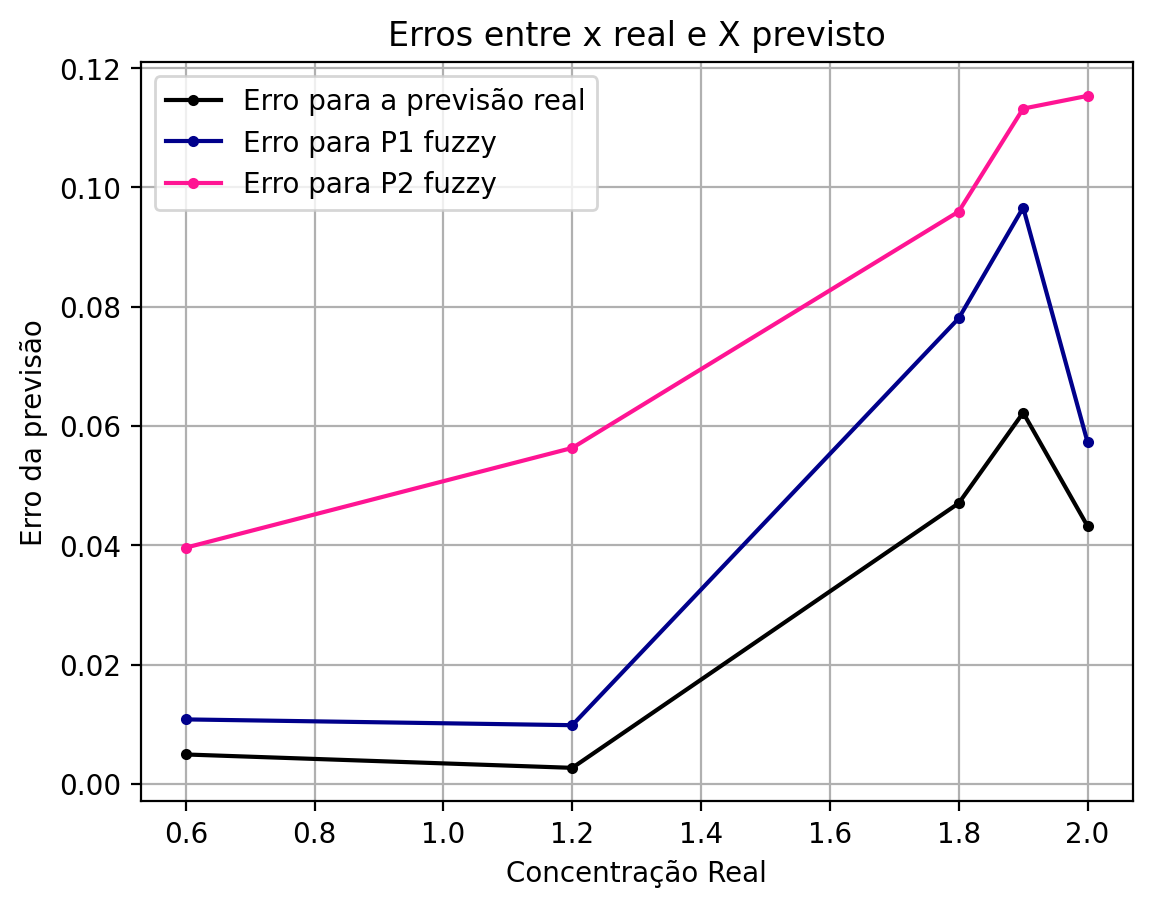

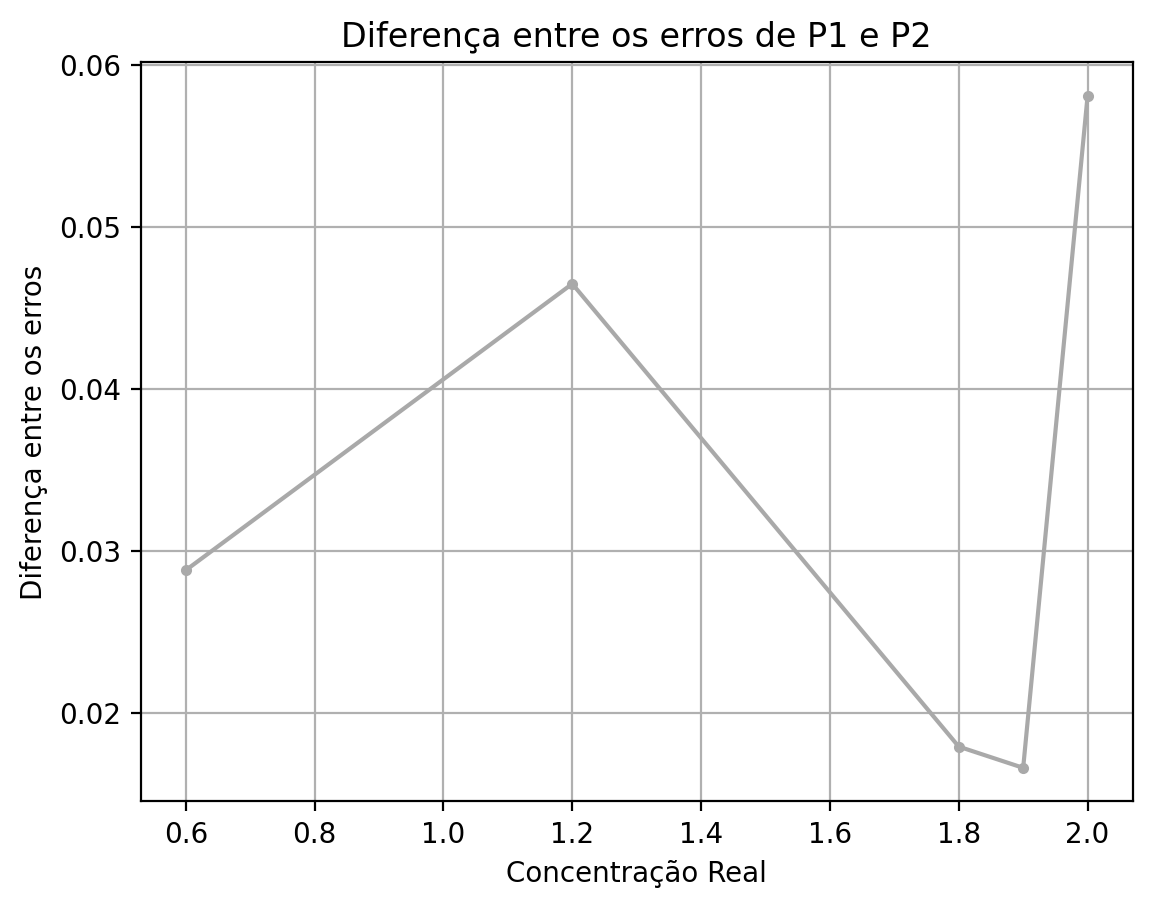

CPU times: total: 141 ms
Wall time: 459 ms


In [7]:
%%time

from lei_de_lambert_fuzzy import representacao_triangular, real2fuzzy, metr_hausdorff, metr_maximo, media

xpt1 = [representacao_triangular(x) for x in xp[0]]
xpt2 = [representacao_triangular(x) for x in xp[1]]

x_fuzzy = [real2fuzzy(xr_prev[i], 1001) for i in range(5)]
x1 = xp[0]
x2 = xp[1]

erros_real = []
erros1 = []
erros2 = []
difs = [] 

for i in range(5):
    er = metr_maximo([xr_prev[i]], [conc_prev[i]])
    erros_real.append(er)
    
    e1 = metr_hausdorff(x1[i], x_fuzzy[i])
    erros1.append(e1)
    
    e2 = metr_hausdorff(x2[i], x_fuzzy[i])
    erros2.append(e2)
    
    dif = abs(e1 - e2)
    difs.append(dif)
    
err_real = media(erros_real)
err1 = media(erros1)
err2 = media(erros2)
dif_med = media(difs)

print("------- REGRESSÃO LINEAR -------")

print(" ")

print(f"Coeficientes do ajuste de curva real:")
print(coefs)

print(" ")

print(f"Coeficientes fuzzy da Solução 1 para o ajuste de curva fuzzy:")
print(sol[0])

print(" ")

print(f"Coeficientes fuzzy da Solução 2 para o ajuste de curva fuzzy:")
print(sol[1])

print(" ")
print(" ") 

print("--- PREVISÃO DE CONCENTRAÇÃO ---")

print(" ")

print(f"Concentrações reais para previsão:")
print(xr_prev)

print(" ")

print(f"Previsão de concentração real:")
print(conc_prev)

print(" ")

print(f"Previsão de concentração fuzzy pela solução 1:")
print(xpt1)

print(" ")

print(f"Previsão de concentração fuzzy pela solução 2:")
print(xpt2)

print(" ")

print("------- MÉTRICAS DE ERRO -------")

print(" ")

print("Erro médio entre x real conhecido e x real previsto (Métrica do máximo): ", err_real)
print("Erro médio entre entre x real conhecido e x previsto para S1 (Métrica de Hausdorff): ", err1)
print("Erro médio entre entre x real conhecido e x previsto para S2 (Métrica de Hausdorff): ", err2)
print("Diferença média entre os erros fuzzy: ", dif_med)

plt.figure(dpi=200)
plt.plot(xr_prev, erros_real, color = "black", label = "Erro para a previsão real", marker = ".")
plt.plot(xr_prev, erros1, color = "darkblue", label="Erro para P1 fuzzy", marker = ".")
plt.plot(xr_prev, erros2, color = "deeppink", label="Erro para P2 fuzzy", marker = ".")
plt.title("Erros entre x real e X previsto")
plt.xlabel("Concentração Real")
plt.ylabel("Erro da previsão")
plt.legend()
plt.grid()
plt.show()

plt.figure(dpi=200)
plt.plot(xr_prev, difs, color = "darkgrey", marker=".")
plt.title("Diferença entre os erros de P1 e P2")
plt.xlabel("Concentração Real")
plt.ylabel("Diferença entre os erros")
plt.grid()
plt.show()

Dos resultados fuzzy obtidos, S1 está contida em S2. A curva de calibração tradicional corresponde ao pico das curvas fuzzy, e o pico das previsões fuzzy são muito próximos da previsão real. A vantagem das previsões fuzzy se dá pela associação de uma incerteza controlada e maior flexibilidade. Assim, a melhor previsão apresentada é P1, que apresenta o menor diâmetro e considera uma incerteza razoável na análise de concentração de soluções.

## 📌 Conclusões

Por meio dessa abordagem, conseguimos realizar previsões coerentes com a realidade, já que as soluções fuzzy contém a solução determinística. Além disso, a abordagem permite tratar com uma incerteza controlada, fornecendo um cenário mais realista.

## 📚 Referências
**[1]** L. M. Z. G. Passari, M. M. Silva, C. G. Silva, and R. J. Cassella. Estatística aplicada à química: dez dúvidas comuns. Química Nova, 34(5):888–892, 2011.

**[2]** A. M. Simundic. Confidence interval. Biochemia Medica, 18(2):154–161, 2008.

**[3]** T. A. Canassa, A. L. Lamonato, and A. V. Ribeiro. Utilização da lei de lambert-beer para determinação da concentração de soluções. Journal of Experimental Techniques and Instrumentation, 1(2):23–30, jul 2018.

**[4]** R. Custodio, L. T. Kubota, and J. C. de Andrade. Lei dos processos de absorção da radiação. Revista Chemkeys, (3):1–5, sep 2018.

**[5]** L.A. Zadeh. Fuzzy sets. Information and Control, 8(3):338 – 353, 1965.

**[6]** N. J. B. Pinto, V. F. Wasques, E. Esmi, and L.C. Barros. Sistemas lineares fuzzy e problemas de mínimos quadrados aplicados a dados longitudinais. Biomatemática, 32:43–60, 2022.

**[7]** A. L. P. Mendes, L. A. Nunes, Y. B. Shimizu, and V. F. Wasques. Método de quadrados mínimos a partir de sistemas lineares fuzzy: Uma abordagem computacional. In Caderno de Resumos Expandidos do III Encontro do PGMAT, Rio Claro, SP, January 2025. Departamento de Matemática, Instituto de Geociências e Ciências Exatas, UNESP – Câmpus de Rio Claro. 30 e 31 de janeiro de 2025.

**[8]** V. Y. U. Nicoleti, V. F. Wasques, and E. X. S. Miqueles. Study of fuzzy cognitive maps for modeling inverse problem. Submitted to Computational and Applied Mathematics, 2025.

**[9]**. J. D. Alves. Sequências recorrentes de números fuzzy interativos: aplicações em biomatemática. Projeto de dissertação de mestrado, Universidade Estadual Paulista “Júlio de Mesquita Filho” (Unesp), Programa de Pós-Graduação em Matemática, Rio Claro-  SP, 2023.

**[10]**. L. C. Barros and R. C. Bassanezi. *Tópicos de lógica fuzzy e biomatemática*. Coleção IMECC – Textos Didáticos; volume 5, Instituto de Matemática, Estatística e Computação Científica (IMECC), Universidade Estadual de Campinas, Campinas, SP, 2006‑2010.

**[11]** B. Bede. Mathematics of Fuzzy Sets and Fuzzy Logic. Heidelberg: Springer, 2012. Cap. 8, p. 137–138. (Studies in Fuzziness and Soft Computing, v. 295).
ISBN 978-3-642-35220-1.